In [44]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
df1 = pd.read_csv("Dataset.csv")
df1.head()
df1.shape

(614, 13)

In [46]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [47]:
df2 = df1.drop(['Loan_ID','Dependents'],axis='columns')
df2.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [48]:
df2.dropna(subset = ['LoanAmount'], inplace=True)


In [49]:
df2.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)
df2.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,N
2,1.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,Y
3,1.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,Y
5,1.0,1.0,1,1.0,5417,4196.0,267.0,360.0,1.0,2,Y


In [50]:
import math
def fill_null_with_column_average(df, l):
    for name in l:
        column_average = math.floor(df[name].mean())
        df[name].fillna(column_average, inplace=True)

    return df
    
    
l = ['Credit_History','Gender','Married','Self_Employed','Loan_Amount_Term']
df2 = fill_null_with_column_average(df2, l)

df2.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,N
2,1.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,Y
3,1.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,Y
5,1.0,1.0,1,1.0,5417,4196.0,267.0,360.0,1.0,2,Y


In [51]:
df2.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [52]:
df2.shape

(592, 11)

In [53]:
df2['Total_Income'] = df2['ApplicantIncome']+df2['CoapplicantIncome']
df2

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,N,6091.0
2,1.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,Y,3000.0
3,1.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,Y,4941.0
4,1.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,Y,6000.0
5,1.0,1.0,1,1.0,5417,4196.0,267.0,360.0,1.0,2,Y,9613.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,0,Y,2900.0
610,1.0,1.0,1,0.0,4106,0.0,40.0,180.0,1.0,0,Y,4106.0
611,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,2,Y,8312.0
612,1.0,1.0,1,0.0,7583,0.0,187.0,360.0,1.0,2,Y,7583.0


In [54]:
df3 = df2.drop(['ApplicantIncome','CoapplicantIncome'],axis='columns')
df3

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,1.0,1.0,1,0.0,128.0,360.0,1.0,0,N,6091.0
2,1.0,1.0,1,1.0,66.0,360.0,1.0,2,Y,3000.0
3,1.0,1.0,0,0.0,120.0,360.0,1.0,2,Y,4941.0
4,1.0,0.0,1,0.0,141.0,360.0,1.0,2,Y,6000.0
5,1.0,1.0,1,1.0,267.0,360.0,1.0,2,Y,9613.0
...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,1,0.0,71.0,360.0,1.0,0,Y,2900.0
610,1.0,1.0,1,0.0,40.0,180.0,1.0,0,Y,4106.0
611,1.0,1.0,1,0.0,253.0,360.0,1.0,2,Y,8312.0
612,1.0,1.0,1,0.0,187.0,360.0,1.0,2,Y,7583.0


In [55]:
df3.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)
df3

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,1.0,1.0,1,0.0,128.0,360.0,1.0,0,0,6091.0
2,1.0,1.0,1,1.0,66.0,360.0,1.0,2,1,3000.0
3,1.0,1.0,0,0.0,120.0,360.0,1.0,2,1,4941.0
4,1.0,0.0,1,0.0,141.0,360.0,1.0,2,1,6000.0
5,1.0,1.0,1,1.0,267.0,360.0,1.0,2,1,9613.0
...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,1,0.0,71.0,360.0,1.0,0,1,2900.0
610,1.0,1.0,1,0.0,40.0,180.0,1.0,0,1,4106.0
611,1.0,1.0,1,0.0,253.0,360.0,1.0,2,1,8312.0
612,1.0,1.0,1,0.0,187.0,360.0,1.0,2,1,7583.0


In [56]:
X = df3.drop(['Loan_Status'],axis='columns')
y= df3['Loan_Status']

<Axes: xlabel='Education', ylabel='count'>

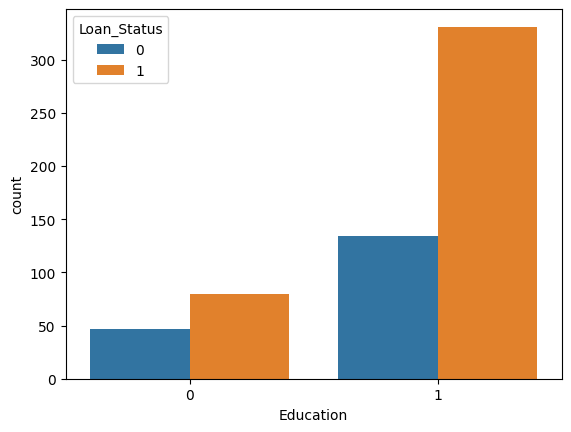

In [57]:
import seaborn as sns
sns.countplot(x='Education',hue='Loan_Status',data=df3)

<Axes: xlabel='Self_Employed', ylabel='count'>

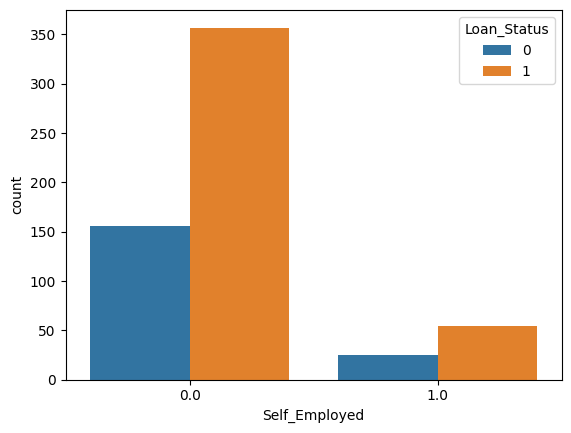

In [58]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df3)

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

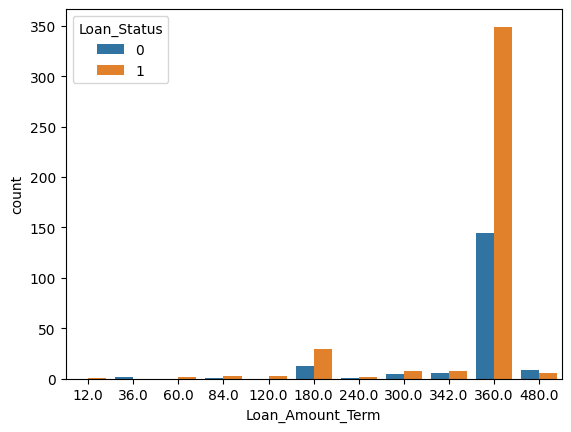

In [59]:
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df3)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [74]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'logistic_regression' : {
            'model': LogisticRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'Random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [10,20],
                
            }
        },
        'SVM': {
            'model': svm.SVC(),
            'params': {
                'kernel' : ['linear','rbf'],
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,model,best_score,best_params
0,logistic_regression,0.759664,{'fit_intercept': False}
1,Random_forest,0.064987,{'n_estimators': 20}
2,SVM,0.697479,{'kernel': 'linear'}


In [85]:
classifier = LogisticRegression(fit_intercept= False)
classifier.fit(X_train,y_train)
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,y_test)
print(test_data_accuray)

0.7983193277310925


c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
input_data = (1,1,0,1,66.0,360.0,1.0,2,3000)

input_data_as_numpy_array = np.asarray(input_data) # changing the input_data to numpy array

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) # reshape the array 

prediction = classifier.predict(input_data_reshaped)
prediction

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)